## Modeling count regressions

### Generating Poisson and Negative Binomial distributions to build regressions on

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### 1. Poisson distribution

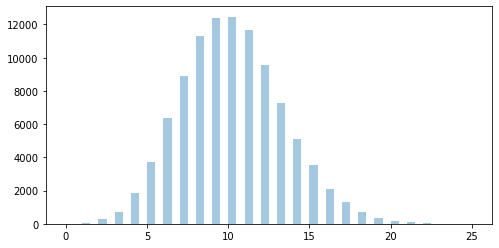

In [23]:
np.random.seed(20202020)

Y_pois = np.random.poisson(lam = 10, size = 100000)

fig, ax = plt.subplots(figsize = (8, 4))
sns.distplot(Y_pois, kde = False)
plt.show()

In [31]:
print('Expected value of distribution is:', Y_pois.mean())
print('Variance of distribution is:', Y_pois.var())
print('Standard deviation of distribution is:', Y_pois.std())

Expected value of distribution is: 9.99662
Variance of distribution is: 9.9319085756
Standard deviation of distribution is: 3.151493070847531


In [89]:
np.random.seed(20202020)

X1 = 1.2 * Y_pois + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))
X2 = - 2 / 3 * Y_pois + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))
X3 = 1 / 3 * Y_pois + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))

print('X1 mean:', X1.mean(), 'std:', X1.std())
print('X2 mean:', X2.mean(), 'std:', X2.std())
print('X3 mean:', X3.mean(), 'std:', X3.std())

X1 mean: 15.26812088818309 std: 5.097300233178801
X2 mean: -3.3872609764569654 std: 4.03143706761874
X3 mean: 6.624826785009855 std: 3.5757461517467193


In [90]:
data = pd.DataFrame(np.concatenate((Y_pois.reshape(-1,1), X1.reshape(-1,1), X2.reshape(-1,1), X3.reshape(-1,1)), 1), columns = ['Y_pois', 'X1', 'X2', 'X3'])
data.head()

,Y_pois,X1,X2,X3
0,9.0,13.605968,1.887032,5.061172
1,7.0,9.950507,1.765672,11.293561
2,11.0,12.730144,-5.529705,5.546413
3,7.0,10.615363,1.256999,4.169956
4,5.0,11.729122,-2.500722,7.145075


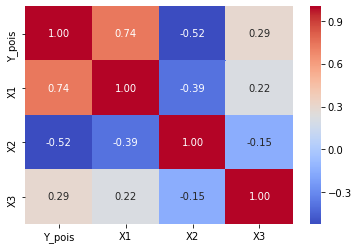

In [93]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

#### Apply simple OLS regression to predict Y

In [97]:
X = data[['X1', 'X2', 'X3']].copy()
X = sm.add_constant(X)
y = data[['Y_pois']].copy()

OLS = sm.OLS(y, X).fit()

In [103]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Y_pois   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                 5.536e+04
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:59:10   Log-Likelihood:            -2.0775e+05
No. Observations:              100000   AIC:                         4.155e+05
Df Residuals:                   99996   BIC:                         4.155e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8340      0.021    135.794      0.000       2.793       2.875
X1             0.3764      0.001    285.245      0.000       0.374       0.379
X2            -0.2087      0.002   -126.714      0.000      -0.212      -0.205
X3             0.1069      0.002     60.910      0.000       0.104       0.110
==============================================================================
Omnibus:                      463.130   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.214
Skew:                           0.164   Prob(JB):                    7.84e-103
Kurtosis:                       3.069   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
print('RMSE with simple OLS regression:', round(np.sqrt(mean_squared_error(y, OLS.predict(X))), 3))
print('r2 with simple OLS regression:', round(r2_score(y, OLS.predict(X)), 3))

RMSE with simple OLS regression: 1.932
r2 with simple OLS regression: 0.624


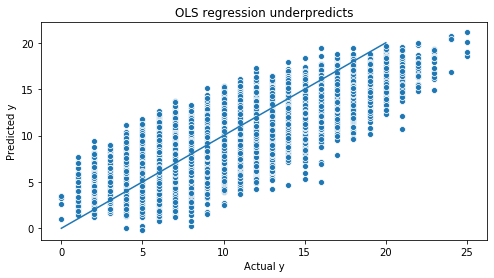

In [130]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.scatterplot(x = Y_pois, y = OLS.predict(X))
sns.lineplot([0, 20], [0, 20])

plt.title('OLS regression underpredicts')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

plt.show()

#### Apply Poisson regression

In [122]:
X = data[['X1', 'X2', 'X3']].copy()
X = sm.add_constant(X)
y = data[['Y_pois']].copy()

POISSON = sm.Poisson(y, X).fit()

Optimization terminated successfully.
         Current function value: 2.251352
         Iterations 5


In [123]:
POISSON.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 Y_pois   No. Observations:               100000
Model:                        Poisson   Df Residuals:                    99996
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.1201
Time:                        23:08:10   Log-Likelihood:            -2.2514e+05
converged:                       True   LL-Null:                   -2.5588e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5618      0.004    432.670      0.000       1.555       1.569
X1             0.0375      0.000    173.193      0.000       0.037       0.038
X2            -0.0201      0.000    -75.261      0.000      -0.021      -0.020
X3             0.0105      0.000     36.201      0.000       0.010       0.011
==============================================================================
"""

In [124]:
print('RMSE with simple OLS regression:', round(np.sqrt(mean_squared_error(y, POISSON.predict(X))), 3))
print('r2 with simple OLS regression:', round(r2_score(y, POISSON.predict(X)), 3))

RMSE with simple OLS regression: 1.929
r2 with simple OLS regression: 0.625


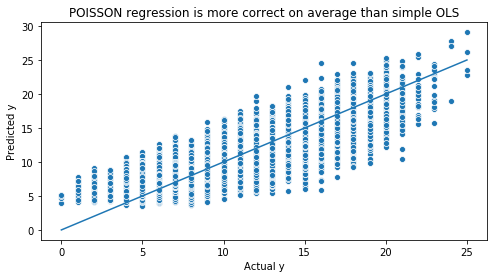

In [131]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.scatterplot(x = Y_pois, y = POISSON.predict(X))
sns.lineplot([0, 25], [0, 25])

plt.title('POISSON regression is more correct on average than simple OLS')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

plt.show()

### 2. Negative Binomial distribution (Poisson with over-dispersion)

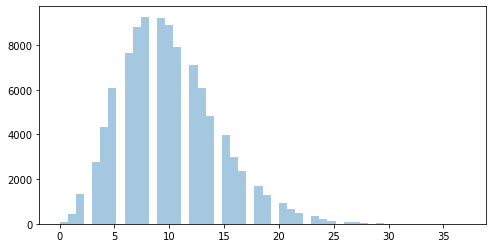

In [149]:
np.random.seed(20202020)

Y_negbin = np.random.negative_binomial(10, 0.5, size = 100000)

fig, ax = plt.subplots(figsize = (8, 4))
sns.distplot(Y_negbin, kde = False)
plt.show()

In [150]:
print('Expected value of distribution is:', Y_negbin.mean())
print('Variance of distribution is:', Y_negbin.var())
print('Standard deviation of distribution is:', Y_negbin.std())

Expected value of distribution is: 9.99693
Variance of distribution is: 19.841660575099997
Standard deviation of distribution is: 4.454397891421466


In [151]:
np.random.seed(20202020)

X1 = 1.2 * Y_negbin + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))
X2 = - 2 / 3 * Y_negbin + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))
X3 = 1 / 3 * Y_negbin + np.random.random(100000) * 10 + np.exp(np.random.random(100000)) * np.log(np.random.random(100000))

print('X1 mean:', X1.mean(), 'std:', X1.std())
print('X2 mean:', X2.mean(), 'std:', X2.std())
print('X3 mean:', X3.mean(), 'std:', X3.std())

X1 mean: 15.268492888183088 std: 6.355973291971072
X2 mean: -3.387467643123632 std: 4.5443405551582705
X3 mean: 6.624930118343189 std: 3.7293915007218015


In [152]:
data = pd.DataFrame(np.concatenate((Y_negbin.reshape(-1,1), X1.reshape(-1,1), X2.reshape(-1,1), X3.reshape(-1,1)), 1), columns = ['Y_negbin', 'X1', 'X2', 'X3'])
data.head()

,Y_negbin,X1,X2,X3
0,5.0,8.805968,4.553698,3.727838
1,14.0,18.350507,-2.900994,13.626894
2,7.0,7.930144,-2.863038,4.213080
3,6.0,9.415363,1.923666,3.836623
4,16.0,24.929122,-9.834055,10.811742


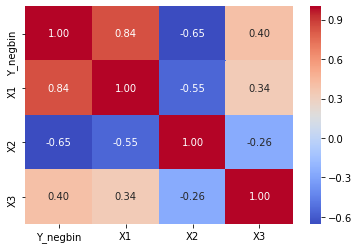

In [153]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

#### Apply simple OLS regression to predict Y

In [154]:
X = data[['X1', 'X2', 'X3']].copy()
X = sm.add_constant(X)
y = data[['Y_negbin']].copy()

OLS = sm.OLS(y, X).fit()

OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_negbin   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.115e+05
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:20:13   Log-Likelihood:            -2.1784e+05
No. Observations:              100000   AIC:                         4.357e+05
Df Residuals:                   99996   BIC:                         4.357e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1934      0.020     60.755      0.000       1.155       1.232
X1             0.4629      0.001    352.795      0.000       0.460       0.465
X2            -0.2556      0.002   -142.846      0.000      -0.259      -0.252
X3             0.1313      0.002     67.880      0.000       0.127       0.135
==============================================================================
Omnibus:                      715.832   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.100
Skew:                           0.204   Prob(JB):                    6.45e-160
Kurtosis:                       3.097   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
print('RMSE with simple OLS regression:', round(np.sqrt(mean_squared_error(y, OLS.predict(X))), 3))
print('r2 with simple OLS regression:', round(r2_score(y, OLS.predict(X)), 3))

RMSE with simple OLS regression: 2.137
r2 with simple OLS regression: 0.77


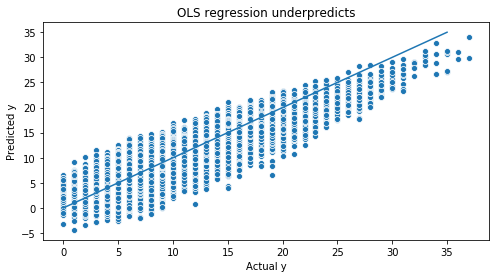

In [158]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.scatterplot(x = Y_negbin, y = OLS.predict(X))
sns.lineplot([0, 35], [0, 35])

plt.title('OLS regression underpredicts')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

plt.show()

#### Apply Negative Binomial regression

In [161]:
X = data[['X1', 'X2', 'X3']].copy()
X = sm.add_constant(X)
y = data[['Y_negbin']].copy()

NEGBIN = sm.NegativeBinomial(y, X).fit()

NEGBIN.summary()

         Current function value: 2.297478
         Iterations: 30
         Function evaluations: 125
         Gradient evaluations: 113


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               Y_negbin   No. Observations:               100000
Model:               NegativeBinomial   Df Residuals:                    99996
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.2006
Time:                        23:22:46   Log-Likelihood:            -2.2975e+05
converged:                      False   LL-Null:                   -2.8738e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4219      0.003    466.316      0.000       1.416       1.428
X1             0.0429      0.000    226.690      0.000       0.043       0.043
X2            -0.0228      0.000    -87.560      0.000      -0.023      -0.022
X3             0.0119      0.000     41.385      0.000       0.011       0.013
alpha       2.307e-08   2.42e-07      0.095      0.924   -4.51e-07    4.98e-07
==============================================================================
"""

In [162]:
print('RMSE with simple OLS regression:', round(np.sqrt(mean_squared_error(y, NEGBIN.predict(X))), 3))
print('r2 with simple OLS regression:', round(r2_score(y, NEGBIN.predict(X)), 3))

RMSE with simple OLS regression: 2.263
r2 with simple OLS regression: 0.742


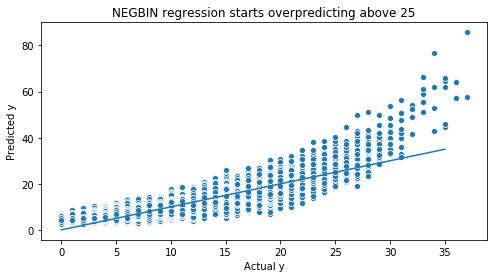

In [165]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.scatterplot(x = Y_negbin, y = NEGBIN.predict(X))
sns.lineplot([0, 35], [0, 35])

plt.title('NEGBIN regression starts overpredicting above 25')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

plt.show()

# TODO: investigate negbin problem, find appropriate regression model that can take care of the tail in the distribution